In [1]:
import pandas as pd
import json
import numpy as np

In [274]:
data2016 = json.load(open('condensed_2017.json'))

What does the dataset look like ? The dataset is a collection of json files, 1 for each year. The file for 2017
is currently being update on an hourly basis. In each json file, there is an array where each element represents
a seperate tweet. In each array element, the following information can be found:<br>

<b>created_at:</b> the date the tweet was posted<br>
favourite_count: the number of individual users that liked this post<br>
id_str: an id for this tweet<br>
in_reply_to_user_id_str: the id of a tweet that this tweet is a reply to<br>
in_retweet: <br>
retweet_count: the amount of times this tweet was retweeted<br>
source: which device it was posted from (desktop/phone)<br>
text: the actual text from this tweet<br>

In [275]:
#Dataframe containing all tweets from 2016
df = pd.DataFrame(data2016)
df.rename(columns={"id_str":"id","created_at":"date","favourite_count":"likes","in_reply_to_user_id_str":"reply_id"},inplace=True)
df = df.set_index("id")

In [276]:
df

,date,favorite_count,reply_id,is_retweet,retweet_count,source,text
id,,,,,,,
935152378747195392,Mon Nov 27 14:24:36 +0000 2017,39685,None,False,8437,Twitter for iPhone,"The Tax Cut Bill is coming along very well, gr..."
935150368207654912,Mon Nov 27 14:16:36 +0000 2017,30766,None,False,7176,Twitter for iPhone,The good news is that their ratings are terrib...
935147410472480769,Mon Nov 27 14:04:51 +0000 2017,82892,None,False,23496,Twitter for iPhone,We should have a contest as to which of the Ne...
934961858380955648,Mon Nov 27 01:47:32 +0000 2017,70471,None,False,14581,Twitter for iPhone,"Back in D.C., big week for Tax Cuts and many o..."
934896989539586054,Sun Nov 26 21:29:46 +0000 2017,133875,None,False,30416,Twitter for iPhone,"Since the first day I took office, all you hea..."
934792302341521408,Sun Nov 26 14:33:47 +0000 2017,70295,None,False,16170,Twitter for iPhone,I endorsed Luther Strange in the Alabama Prima...
934781939088629761,Sun Nov 26 13:52:36 +0000 2017,92822,None,False,24388,Twitter for iPhone,The last thing we need in Alabama and the U.S....
934563828834164739,Sat Nov 25 23:25:54 +0000 2017,63753,None,False,18789,Twitter for iPhone,"Wow, even I didn’t realize we did so much. Wis..."
934551607596986368,Sat Nov 25 22:37:21 +0000 2017,107952,None,False,32367,Twitter for iPhone,.@FoxNews is MUCH more important in the United...


In [277]:
'''
Observations:
reply_id seems to be None for a lot of entries, not sure if it's the case for all of them.
Can be dropped if its always None

Text needs to be cleaned of certain characters

Note that retweet != reply. Retweet means that trump took someone else's tweet and posted it on his page.
Reply means he directly tweets to a tweet someone else made
'''

"\nObservations:\nreply_id seems to be None for a lot of entries, not sure if it's the case for all of them.\nCan be dropped if its always None\n\nText needs to be cleaned of certain characters\n\nNote that retweet != reply. Retweet means that trump took someone else's tweet and posted it on his page.\nReply means he directly tweets to a tweet someone else made\n"

In [278]:
'''
Text cleaning

In the text we can see that the ampersand symbol & is often encoded as &amp; so we need to replace all occurences of this
We can also remove http links for now as they are not really contributing to a sentiment analysis

We should exctract hashtags as they reveal something important, can put them in a new column where each entry is a list ?

Remove \n characters 
'''

#Given a text t, returns all hashtags as a list
def GetHashtags(t):
    hashtags=[]
    splitText=text.split(" ")
    for s in splitText:
        if("#" in s):
            hashtags.append(s)
    return hashtags

#    i=242
for i in range(len(df)):
    text=df.iloc[i]["text"]
    text=text.replace("&amp;","&")
    text=text.replace("\n;","")
    
    text=" ".join(text.split("\n"))

    text=text.split("https",1)[0]   
    
    
    hashtags=GetHashtags(text)
    df.set_value(i,"text",text)




In [279]:
df

,date,favorite_count,reply_id,is_retweet,retweet_count,source,text
id,,,,,,,
935152378747195392,Mon Nov 27 14:24:36 +0000 2017,39685.0,None,False,8437.0,Twitter for iPhone,"The Tax Cut Bill is coming along very well, gr..."
935150368207654912,Mon Nov 27 14:16:36 +0000 2017,30766.0,None,False,7176.0,Twitter for iPhone,The good news is that their ratings are terrib...
935147410472480769,Mon Nov 27 14:04:51 +0000 2017,82892.0,None,False,23496.0,Twitter for iPhone,We should have a contest as to which of the Ne...
934961858380955648,Mon Nov 27 01:47:32 +0000 2017,70471.0,None,False,14581.0,Twitter for iPhone,"Back in D.C., big week for Tax Cuts and many o..."
934896989539586054,Sun Nov 26 21:29:46 +0000 2017,133875.0,None,False,30416.0,Twitter for iPhone,"Since the first day I took office, all you hea..."
934792302341521408,Sun Nov 26 14:33:47 +0000 2017,70295.0,None,False,16170.0,Twitter for iPhone,I endorsed Luther Strange in the Alabama Prima...
934781939088629761,Sun Nov 26 13:52:36 +0000 2017,92822.0,None,False,24388.0,Twitter for iPhone,The last thing we need in Alabama and the U.S....
934563828834164739,Sat Nov 25 23:25:54 +0000 2017,63753.0,None,False,18789.0,Twitter for iPhone,"Wow, even I didn’t realize we did so much. Wis..."
934551607596986368,Sat Nov 25 22:37:21 +0000 2017,107952.0,None,False,32367.0,Twitter for iPhone,.@FoxNews is MUCH more important in the United...


In [280]:
#Should we use lower case of texts here ?.lower()
def CreateDictionary(df):
    textDict={}
    for i in range(len(df)):
        t=df.iloc[i]["text"]
        splitT=t.split(" ")
        for s in splitT:
            if(textDict.get(s)==None):
                textDict[s]=1
            else:
                textDict[s]+=1
    return textDict
            
textDict=CreateDictionary(df)

In [281]:
trumpDict=pd.DataFrame.from_dict(list(textDict.items()))
trumpDict.rename(columns={0:"words",1:"occurences"},inplace=True)
trumpDict.sort_values("occurences",ascending=False,inplace=True)


#DF of all hashtags
trumpDict[trumpDict["words"].str.contains("#")]


,words,occurences
1130,#USA🇺🇸,46
2945,#MAGA,31
1143,#FakeNews,22
5834,#MAGA🇺🇸,21
5353,#HurricaneHarvey,20
2542,#TaxReform,19
4510,#UNGA,15
1232,#MAGA!,14
1361,#APEC2017,14
6440,#AmericaFirst🇺🇸,13


## Sentiment Analysis

In [282]:
from aylienapiclient import textapi
import csv
import time
client = textapi.Client("9a0daca1", "62fbf9df3887a46f0e59e3815a958b6a")
sentiment = client.Sentiment({'text': "Make America Great Again!"})
print(sentiment)

{'polarity': 'positive', 'subjectivity': 'objective', 'text': 'Make America Great Again!', 'polarity_confidence': 0.9765748381614685, 'subjectivity_confidence': 0.9982027963959077}


In [ ]:
def analyse(tweet):
    text = tweet['text'].strip()
    sleepTime = 4
    if len(text) == 0:
        print('** skipped')
        return None
    while(True):
        try:
            sentiment = client.Sentiment({'text': text})
            sentiment['id'] = tweet.name
            print(text)
            return sentiment
        except:
            print("Sleeping... (time:", sleepTime, ")")
            time.sleep(sleepTime)
            sleepTime *= 2

def analyseTweets(df, batch_size=100):
    i = 0
    sentiments = pd.DataFrame()
    while(i <= len(df)):
        batch = df[i:(i + batch_size)].apply(analyse, axis=1).tolist()
        t0 = time.time()
        new = pd.DataFrame(batch).set_index('id')
        t1 = time.time()
        print("DataFrame(): %f" % (t1 - t0))
        t0 = time.time()
        sentiments = sentiments.append(new)
        t1 = time.time()
        print("tolist(): %f" % (t1 - t0))
        time.sleep(batch_size // 10)
        i += batch_size
        print("Tweets analysed:", i)
    return sentiments

sentiments = analyseTweets(df)
sentiments.to_csv('sentiments.csv')

## Clustering

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [320]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
from gensim import corpora, models
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%pylab inline
import re

Populating the interactive namespace from numpy and matplotlib


C:\Users\Michele\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['zeros']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [284]:
def preProcess_procedure(tweet):
    original = tweet
    tweet = re.sub(r'([a-z]+)\.([A-Z].+)', '\1 \2', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'(\d+[:\/,\.])+\d+ *([ap]\.?m\.?)?', '', tweet)
    tokenizer = RegexpTokenizer(r'[a-z_@#][a-z0-9_\'\.]+[a-z0-9_]')
    tweet = tokenizer.tokenize(tweet)
    stopwords = get_stop_words('en')
    stopwords.append('amp')
    p_stemmer = PorterStemmer()
    tweet = [i for i in tweet if not i in stopwords]
    tweet = [p_stemmer.stem(i) for i in tweet]
    #print(original, "=>", tweet)
    return tweet
    
def preProcess(tweets, ratio=0.8):
    tweets.index = range(len(tweets))
    indices = np.random.permutation(tweets.index)
    train_len = int(len(tweets) * ratio)
    train_indices = indices[:train_len]
    test_indices = indices[train_len:]
    orig_test = tweets[test_indices]
    tweets = tweets.map(preProcess_procedure)
    dictionary = corpora.Dictionary(tweets)
    train = [dictionary.doc2bow(tweets[tweet]) for tweet in train_indices]
    test = [dictionary.doc2bow(tweets[tweet]) for tweet in test_indices]
    return train, test, orig_test, dictionary
    
train, ltest, orig_test, dictionary = preProcess(df['text'])

In [372]:
lda = models.ldamodel.LdaModel(train, num_topics=2, id2word = dictionary, passes=50)    

In [382]:
clusters = [max(lda[tweet], key=lambda tup: tup[1]) for tweet in ltest if len(tweet) > 0]

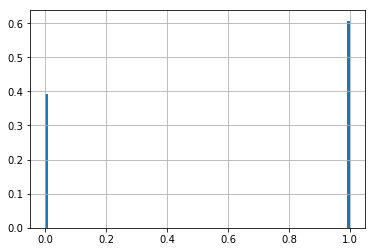

In [383]:
w = [1 / len(clusters)] * len(clusters)
pd.Series([c[0] for c in clusters]).hist(bins=100, weights=w)

In [384]:
dfTest = pd.DataFrame(columns=['Max Topic', 'Text'])
orig_test.index = range(len(orig_test))
dfTest['Max Topic'] = [c[0] for c in clusters]
dfTest['Text'] = [orig_test[i] for i in range(len(orig_test)) if len(ltest[i]) > 0]

In [385]:
def testTopic(dfTest, i):
    group = dfTest[dfTest['Max Topic'] == i]['Text']
    group.apply(lambda x: print(x, "\n"))
    print("frequency:", len(group) / len(dfTest) * 100, "%")

testTopic(dfTest, 0)

RT @DRUDGE_REPORT: GREAT AGAIN: FEDS ARREST MURDER SUSPECT IN 'FAST AND FURIOUS' SCANDAL... https://t.co/clOLxTE3D4 

Was with great people last night in Fort Myer, Virginia. The future of our country is strong! 

It was an honor to welcome Republican and Democratic members of the Senate Finance Committee to the @WhiteHouse today. #TaxReform https://t.co/ge4Xic9fId 

It was an honor to welcome the Prime Minister of Denmark, Lars Løkke Rasmussen {@larsloekke} to the @WhiteHouse yes…  

@NYGovCuomo @NYCMayor ...fully supports any and all of their efforts with respect to the West Side attack. #NYCStrong 

My warmest condolences and sympathies to the victims and families of the terrible Las Vegas shooting. God bless you! 

Meeting w/ Washington, D.C. @MayorBowser and Metro GM Paul Wiedefeld about incoming winter storm preparations here…  

Speech transcript at Arab Islamic American Summit ➡️ 

HAPPY 70th BIRTHDAY to the @USAirForce! The American people are eternally grateful. Thank you for

In [387]:
testTopic(dfTest, 1)

Despite the Fake News Media in conjunction with the Dems, an amazing job is being done in Puerto Rico. Great people! 

At 9:00 P.M. @CNN, of all places, is doing a Special Report on my daughter, Ivanka. Considering it is CNN, can't imagine it will be great! 

I hereby demand a second investigation, after Schumer, of Pelosi for her close ties to Russia, and lying about it. https://t.co/qCDljfF3wN 

Nick Adams, "Retaking America"  "Best things of this presidency aren't reported about. Convinced this will be perhaps best presidency ever." 

...and did not want to "rock the boat." He didn't "choke," he colluded or obstructed, and it did the Dems and Crooked Hillary no good. 

Ron Estes is running TODAY for Congress in the Great State of Kansas. A wonderful guy, I need his help on Healthcare &amp; Tax Cuts (Reform). 

We are going to defend our industry &amp; create a level playing field for the American worker. It is time to put… https://t.co/dzPKJMghj1 

RT @Reince45: Promise kept. @POTUS

In [386]:
lda.show_topics(num_words=100)

[(0,
  '0.021*"great" + 0.016*"thank" + 0.014*"today" + 0.011*"presid" + 0.009*"will" + 0.008*"meet" + 0.008*"honor" + 0.007*"nation" + 0.007*"state" + 0.007*"america" + 0.006*"day" + 0.006*"unit" + 0.006*"@realdonaldtrump" + 0.005*"trump" + 0.005*"peopl" + 0.004*"welcom" + 0.004*"american" + 0.004*"@whitehous" + 0.004*"happi" + 0.004*"order" + 0.004*"just" + 0.004*"first" + 0.004*"u." + 0.004*"forward" + 0.004*"militari" + 0.004*"join" + 0.004*"new" + 0.003*"women" + 0.003*"look" + 0.003*"@potu" + 0.003*"live" + 0.003*"@flotu" + 0.003*"minist" + 0.003*"congratul" + 0.003*"wonder" + 0.003*"countri" + 0.003*"full" + 0.003*"prime" + 0.003*"famili" + 0.003*"#usa" + 0.003*"job" + 0.003*"texa" + 0.003*"morn" + 0.003*"secur" + 0.003*"white" + 0.003*"work" + 0.003*"help" + 0.003*"world" + 0.002*"melania" + 0.002*"men" + 0.002*"law" + 0.002*"watch" + 0.002*"protect" + 0.002*"attack" + 0.002*"court" + 0.002*"korea" + 0.002*"hous" + 0.002*"leader" + 0.002*"safe" + 0.002*"everyon" + 0.002*"announ

In [373]:
# Show Clustering
i = 0
for tweet in ltest:
    print(orig_test.iloc[i], "\n")
    print(sorted(lda[tweet], key=lambda tup: tup[1], reverse=True), "\n")
    i += 1

Despite the Fake News Media in conjunction with the Dems, an amazing job is being done in Puerto Rico. Great people! 

[(1, 0.94902958212487665), (0, 0.050970417875123346)] 

At 9:00 P.M. @CNN, of all places, is doing a Special Report on my daughter, Ivanka. Considering it is CNN, can't imagine it will be great! 

[(1, 0.69559063706640056), (0, 0.30440936293359944)] 

RT @DRUDGE_REPORT: GREAT AGAIN: FEDS ARREST MURDER SUSPECT IN 'FAST AND FURIOUS' SCANDAL... https://t.co/clOLxTE3D4 

[(0, 0.88084499177646147), (1, 0.11915500822353853)] 

Was with great people last night in Fort Myer, Virginia. The future of our country is strong! 

[(0, 0.55833319687293348), (1, 0.44166680312706652)] 

I hereby demand a second investigation, after Schumer, of Pelosi for her close ties to Russia, and lying about it. https://t.co/qCDljfF3wN 

[(1, 0.95086909766176297), (0, 0.049130902338236956)] 

It was an honor to welcome Republican and Democratic members of the Senate Finance Committee to the @WhiteHo

Great listening session with CEO's of the Retail Industry Leaders Association this morning! https://t.co/sy6xJcWfcF 

[(0, 0.94237252221103129), (1, 0.057627477788968651)] 

The first meeting Jeff Sessions had with the Russian Amb was set up by the Obama Administration under education program for 100 Ambs...... 

[(0, 0.60431843440237931), (1, 0.39568156559762069)] 

Join me live as we recognize the first responders to the June 14th shooting involving @SteveScalise. #TeamScalise https://t.co/qOolNmB65d https://t.co/6OCn9JfMAG 

[(0, 0.95011003560854523), (1, 0.049889964391454662)] 

Happy #SmallBusinessSaturday!

A great day to support your community and America’s JOB creators by shopping locally at a #SmallBiz. #ShopSmall https://t.co/pBQaBHvl7k 

[(0, 0.95181518209578286), (1, 0.048184817904217143)] 

Working hard on the biggest tax cut in U.S. history. Great support from so many sides. Big winners will be the middle class, business & JOBS 

[(1, 0.96929069525858169), (0, 0.030709304

Why are Democrats fighting massive tax cuts for the middle class and business (jobs)? The reason: Obstruction and Delay! 

[(1, 0.95951129863632489), (0, 0.040488701363675071)] 

The Senate Democrats have only confirmed 48 of 197 Presidential Nominees. They  can't win so all they do is slow things down & obstruct! 

[(1, 0.76778213859798716), (0, 0.23221786140201273)] 

Today we honored our true American heroes on the first-ever National Vietnam War Veterans Day. #ThankAVeteran…  

[(0, 0.94824400664766195), (1, 0.051755993352338027)] 

Do you notice we are not having a gun debate right now? That's because they used knives and a truck! 

[(1, 0.84237745176685908), (0, 0.15762254823314092)] 

North Korea has just launched another missile. Does this guy have anything better to do with his life? Hard to believe that South Korea..... 

[(1, 0.86994786870378038), (0, 0.13005213129621968)] 

The military and first responders, despite no electric, roads, phones etc., have done an amazing job.

[(1, 0.81721779665244199), (0, 0.18278220334755804)] 

RT @FoxNews: Geraldo Blasts 'Fake News' Reports About Trump's Visit to Puerto Rico https://t.co/9jO0D3BMvE 

[(1, 0.79346053994118693), (0, 0.20653946005881305)] 

Puerto Rico is devastated. Phone system, electric grid many roads, gone. FEMA and First Responders are amazing. Governor said "great job!" 

[(1, 0.74282724377424647), (0, 0.25717275622575347)] 

Is Fake News Washington Post being used as a lobbyist weapon against Congress to keep Politicians from looking into Amazon no-tax monopoly? 

[(1, 0.89361218091158823), (0, 0.10638781908841179)] 

RT @foxandfriends: U.S. spy satellites detect North Korea moving anti-ship cruise missiles to patrol boat  

[(0, 0.91629735326432071), (1, 0.08370264673567937)] 

Congress, get ready to do your job - DACA! 

[(1, 0.74155779538210143), (0, 0.25844220461789857)] 

Two dozen NFL players continue to kneel during the National Anthem, showing total disrespect to our Flag &amp; Country.  No 

In [345]:
# Computing silhouette in a K-dimensional topic space, where each document is reduced to a K-vector. Note that documents are
# hard assigned to the topic with the highest probability. The centroids are computed as the average point of the cluster.

from collections import defaultdict
"""
def silhouette(lda, tweet):
    kvector = [x[1] for x in sorted(lda[tweet], key=lambda tup: tup[1], reverse=True)]
    if (len(kvector) < 2):
        return 1
    neigh_dist = 1 - kvector[1]
    same_dist = 1 - kvector[0]
    return (neigh_dist - same_dist) / neigh_dist
"""
def silhouette(other, same):
    return (other - same) / max(other, same)

def buildHardClusters(lda, ltest):
    docs = [lda[tweet] for tweet in ltest if len(tweet) > 0]
    clusters = [max(doc, key=lambda tup: tup[1]) for doc in docs]
    dfTest = pd.DataFrame(columns=['Topic', 'Document'])
    dfTest['Topic'] = [c[0] for c in clusters]
    dfTest['Document'] = docs
    return dfTest

def buildCentroid(cluster):
    dic = defaultdict(float)
    for doc in cluster['Document']:
        for comp in doc:
            dic[comp[0]] += comp[1]
    return [(t, p / len(cluster)) for t, p in dic.items()]

def diff(doc1, doc2):
    d = defaultdict(float)
    for comp in doc1:
        d[comp[0]] = comp[1]
    for comp in doc2:
        d[comp[0]] -= comp[1]
    tot = 0
    for k, v in d.items():
        tot += v**2
    return np.sqrt(tot)
    
def compute_silhouette(tweet, centroids):
    same_dist = diff(tweet['Document'], centroids[tweet['Topic']]) 
    # Find nearest neighbor
    neigh_dist = 999
    for i in range(len(centroids)):
        if i == tweet['Topic']:
            continue
        dist = diff(tweet['Document'], centroids[i])
        if dist < neigh_dist:
            neigh_dist = dist
    return silhouette(neigh_dist, same_dist)

def grid_search_k(train, ltest, dictionary, start_k=2, lim=100):
    res = pd.Series(index=range(start_k, lim + 1))
    for k in range(start_k, lim + 1):
        alda = models.ldamodel.LdaModel(train, num_topics=k, id2word = dictionary, passes=20)
        dfTest = buildHardClusters(alda, ltest)
        centroids = dfTest.groupby('Topic').apply(buildCentroid)
        # Compute Average Silhouette
        tot = 0
        part_sil = dfTest.apply(compute_silhouette, args=(centroids,), axis=1)
        sil = sum(part_sil) / len(dfTest)
        print("k =", k, ",", "silhouette =", sil)
        res[k] = sil
    return res

gsk = grid_search_k(train, ltest, dictionary)

k = 2 , silhouette = 0.7600314381266555
k = 3 , silhouette = 0.6752275340791493
k = 4 , silhouette = 0.6140042422538549
k = 5 , silhouette = 0.5843056284001248
k = 6 , silhouette = 0.5634937808802221
k = 7 , silhouette = 0.5444461357828932
k = 8 , silhouette = 0.5345121291019872
k = 9 , silhouette = 0.5124009337536873
k = 10 , silhouette = 0.5040697061853416
k = 11 , silhouette = 0.49080282616663023
k = 12 , silhouette = 0.4790508910985389
k = 13 , silhouette = 0.4914963311174731
k = 14 , silhouette = 0.458577477784802
k = 15 , silhouette = 0.46437586037353934
k = 16 , silhouette = 0.4657706101174737
k = 17 , silhouette = 0.46563137263218274
k = 18 , silhouette = 0.45814675040136654
k = 19 , silhouette = 0.44681182325184804
k = 20 , silhouette = 0.4404248632737023
k = 21 , silhouette = 0.450479056001983
k = 22 , silhouette = 0.43428431342093504
k = 23 , silhouette = 0.4417843784799455
k = 24 , silhouette = 0.43143907239833473
k = 25 , silhouette = 0.4516537367356941
k = 26 , silhouette

KeyboardInterrupt: 

In [374]:
#lda.save(fname="LDAModel2017")

In [376]:
#dfTest.to_csv("Test Sample_2017.csv")

In [398]:
text = "The Consumer Financial Protection Bureau, or CFPB, has been a total disaster as run by the previous Administrations pick. Financial Institutions have been devastated and unable to properly serve the public. We will bring it back to life!"
text = preProcess_procedure(text)
lda[dictionary.doc2bow(text)]

[(0, 0.15086042178481796), (1, 0.84913957821518204)]